## Visualization

In [3]:
#Show plots in the notebook
%matplotlib inline

from sklearn import datasets, preprocessing, feature_extraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
import random
import json as json

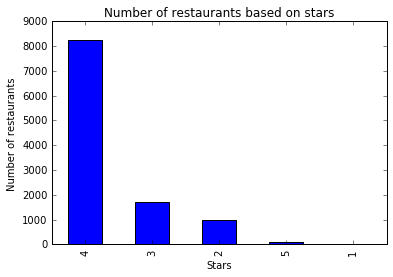

In [5]:
# Using preprocessed data with rounded value of stars
df = pd.read_json('../out/preprocessed_business_data_new.json')
df_new = df.drop(['attributes','business_id', 'hours', 'index', 'working_type'] , axis=1)

count_of_stars = pd.value_counts(df_new['stars'].values)
count_of_stars.plot(kind='bar',color='blue', title="Number of restaurants based on stars")
plt.xlabel('Stars')
plt.ylabel("Number of restaurants")

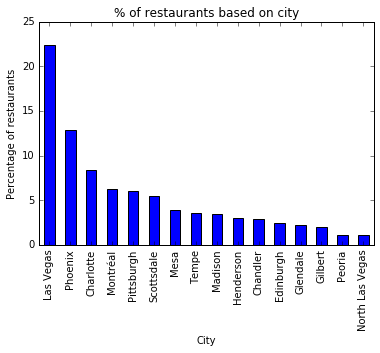

In [6]:
# Create labels
labels = df_new.loc[:,'stars']

# Create attributes dataframe
df_attrs = df_new.drop(['stars'] , axis=1)

res_city = df_attrs .city.value_counts(dropna=True) / df_attrs.shape[0] * 100

# Eliminating cities with < 1% businesses to make a cleaner plot
res_city_filetered = res_city[res_city.values > 1]
res_city_filetered.plot(kind='bar',color='blue',title="% of restaurants based on city")
plt.xlabel('City')
plt.ylabel("Percentage of restaurants")

In [7]:
DATASET_DIR = '../../yelp_dataset_challenge_academic_dataset'

import pandas as pd
import operator

df_business = pd.read_json(DATASET_DIR + '/yelp_academic_dataset_business.json', lines=True)

list_categories = set()

for index, row in df_business.iterrows():
    list_categories |= set(row['categories'])
    
number_of_categories = {}
for c in list_categories:
    df_business_category = df_business[df_business['categories'].apply(lambda cs: c in cs)]
    number_of_categories[c] = len(df_business_category)

sorted_number_of_categories = sorted(number_of_categories.items(), key=operator.itemgetter(1), reverse=True)
top_businesses = sorted_number_of_categories[:20]

In [8]:
top_businesses

[(u'Restaurants', 26729),
 (u'Shopping', 12444),
 (u'Food', 10143),
 (u'Beauty & Spas', 7490),
 (u'Health & Medical', 6106),
 (u'Home Services', 5866),
 (u'Nightlife', 5507),
 (u'Automotive', 4888),
 (u'Bars', 4727),
 (u'Local Services', 4041),
 (u'Active Life', 3455),
 (u'Fashion', 3395),
 (u'Event Planning & Services', 3237),
 (u'Fast Food', 3154),
 (u'Pizza', 2881),
 (u'Mexican', 2705),
 (u'Hotels & Travel', 2673),
 (u'Sandwiches', 2666),
 (u'American (Traditional)', 2608),
 (u'Arts & Entertainment', 2447)]

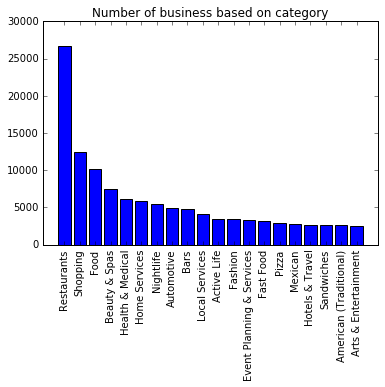

In [10]:
top_businesses_type = [i[0] for i in top_businesses]
top_businesses_number = [i[1] for i in top_businesses]

plt.title('Number of business based on category')
plt.bar(range(len(top_businesses_number)), top_businesses_number, color='blue')
plt.xticks([(i + 0.4) for i in range(len(top_businesses_type))], top_businesses_type, rotation='vertical')

plt.margins(0.05, None)

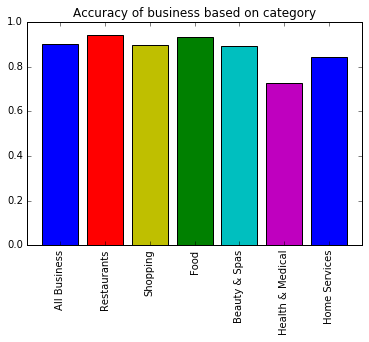

In [11]:
category_name = ['All Business',
                 'Restaurants',
                 'Shopping',
                 'Food',
                 'Beauty & Spas',
                 'Health & Medical',
                 'Home Services']

category_accuracy = [0.903606259922885,
                     0.9402173913043478,
                     0.8975741239892183,
                     0.9332273449920508,
                     0.8924731182795699,
                     0.7261146496815286,
                     0.8431372549019608]

plt.title('Accuracy of business based on category')
plt.bar(range(len(category_accuracy)), category_accuracy, color=['b', 'r', 'y', 'g', 'c', 'm'])
plt.xticks([(i + 0.4) for i in range(len(category_name))], category_name, rotation='vertical')

plt.margins(0.05, None)

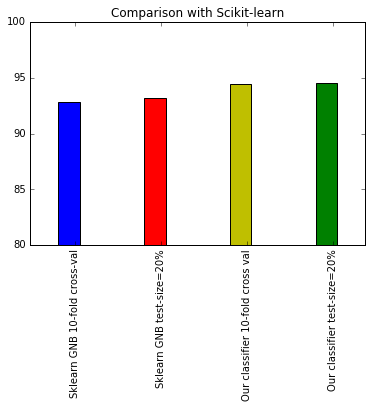

In [60]:
exp_name = ['Sklearn GNB 10-fold cross-val',
                 'Sklearn GNB test-size=20%',
                 'Our classifier 10-fold cross val',
                   'Our classifier test-size=20%']
                 
experiments_accuracy = [92.87, 93.2, 94.4, 94.56]

plt.title('Comparison with Scikit-learn')
plt.bar(range(len(experiments_accuracy)), experiments_accuracy, color=['b', 'r', 'y', 'g'], 
        width=0.25)
plt.xticks([(i + 0.2) for i in range(len(exp_name))], exp_name, rotation='vertical')
plt.ylim([80, 100])
plt.margins(0.1, None)

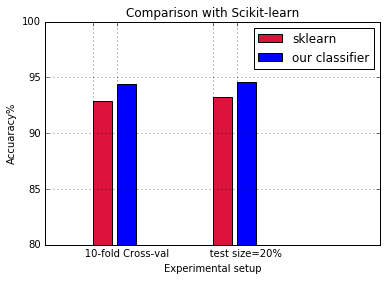

In [59]:
# Reference http://maheshakya.github.io/miscellaneous/2015/06/04/a-quick-guide-plotting-with-
# python-and-matplotlib-2.html

# Defines the sizes of the axes
plt.axis([0,14, 0,140])

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc="crimson")
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc="blue")


plt.legend((p1, p2), ('sklearn','our classifier'), loc='upper right')

# Defines labels for each group
labels = ['        ','      10-fold Cross-val', '        ', '      test size=20%']

# Creates discrete values for x co-ordinates (widths of the bars)
x = np.array([1,2,6,7]) + 1

# Defines some random set of values for y (heights of the bars)
y = np.array([92.87, 94.4, 93.2, 94.56])
 
# Replaces the names in the x-axis with labels
plt.xticks(x, labels)

# Creates the bar chart
plt.bar(left = x, height=y, color=['crimson', 'blue'])

plt.grid(which='both')
plt.ylim([80, 100])
plt.ylabel('Accuaracy%')
plt.xlabel('Experimental setup')
plt.title("Comparison with Scikit-learn")

plt.show()